In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt


In [2]:
ad_data = pd.read_csv('Advertising.csv',index_col='Unnamed: 0')


In [3]:
ad_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
ad_data.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
x = ad_data.drop(["Sales"],axis=1)
y = ad_data.Sales

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [8]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X,y)
y_pred = regr.predict(X)

In [9]:
print("R squared: {}".format(r2_score(y_true=y,y_pred=y_pred)))


R squared: 0.8972106381789522


In [11]:
import numpy as np
residuals = y.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -1.865174681370263e-16


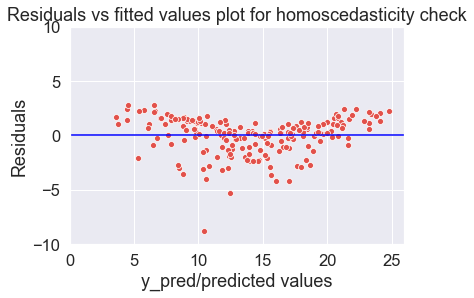

In [12]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')


In [14]:
import statsmodels.stats.api as sms

from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X)
lzip(name, test)

[('F statistic', 1.3437995226729404), ('p-value', 0.07369564428747298)]

In [15]:
from scipy.stats import bartlett
test = bartlett( X,residuals)
print(test)

ValueError: Samples must be one-dimensional.

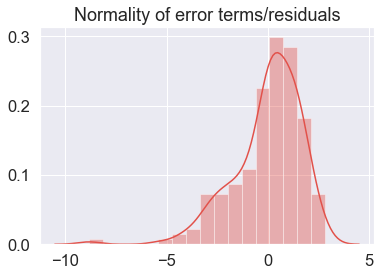

In [16]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

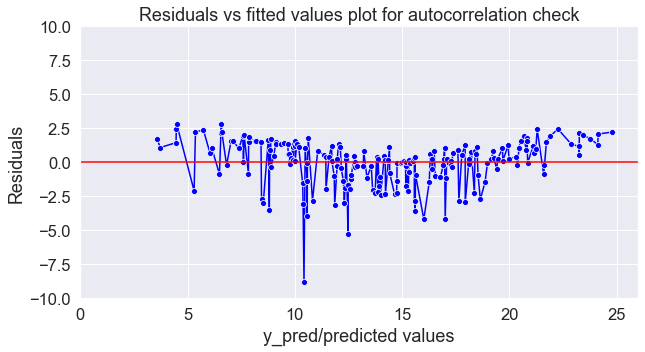

In [17]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [18]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.5041767432843896

In [19]:
import statsmodels.api as sm


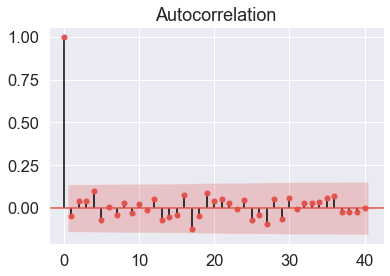

In [20]:
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

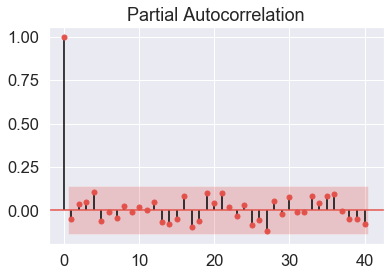

In [21]:
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()


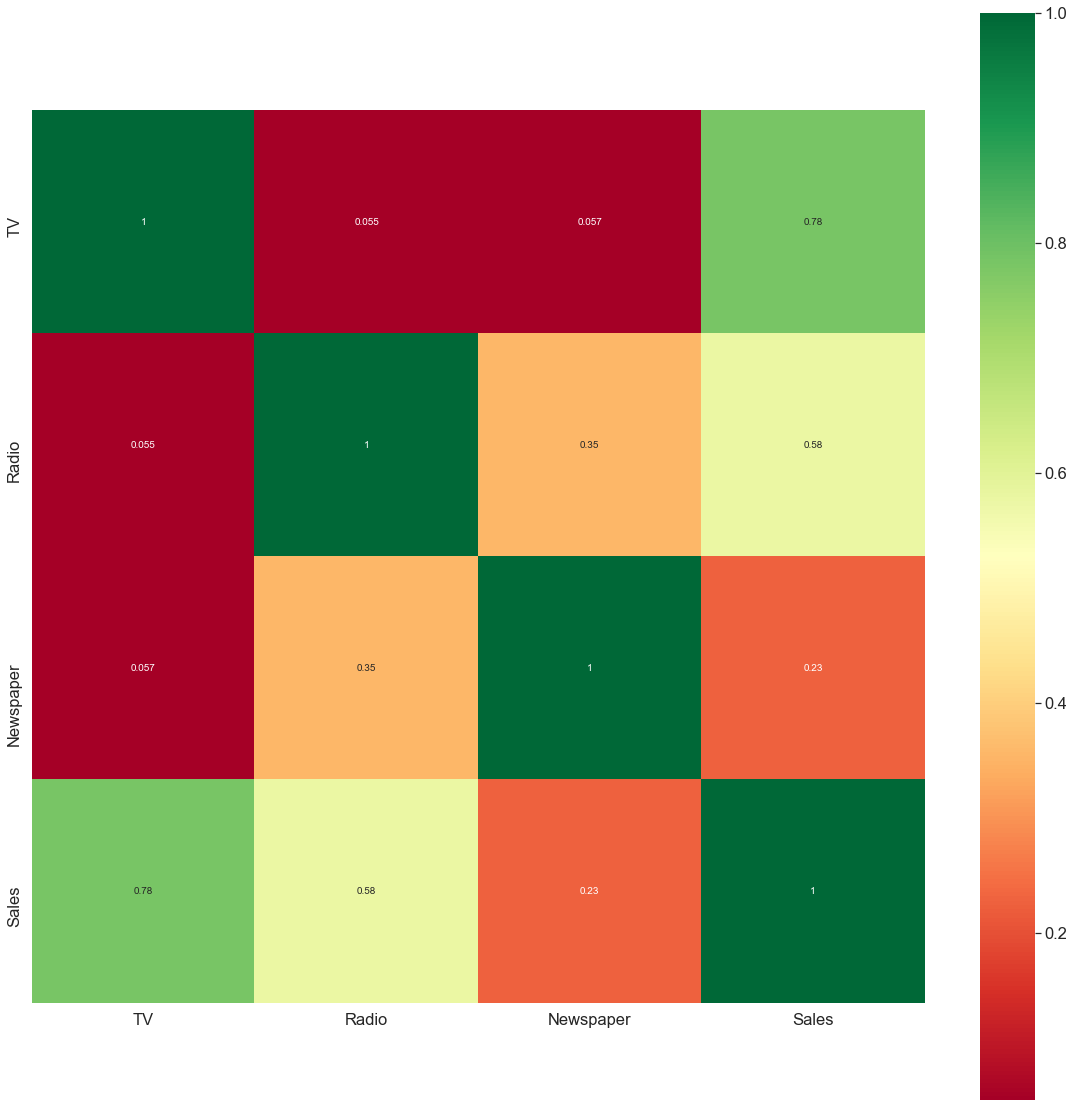

In [22]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(ad_data.corr(), annot=True,cmap='RdYlGn',square=True)

In [26]:
ad_datalog = np.log(ad_data)


In [27]:
ad_datalog.head(10)

,TV,Radio,Newspaper,Sales
1,5.438514,3.632309,4.237001,3.095578
2,3.795489,3.671225,3.808882,2.341806
3,2.844909,3.826465,4.238445,2.230014
4,5.020586,3.720862,4.069027,2.917771
5,5.197391,2.379546,4.067316,2.557227
6,2.163323,3.889777,4.317488,1.974081
7,4.051785,3.490429,3.157000,2.468100
8,4.789157,2.975530,2.451005,2.580217
9,2.151762,0.741937,0.000000,1.568616
10,5.297317,0.955511,3.054001,2.360854


In [28]:
x = ad_datalog.drop(["Sales"],axis=1)
y = ad_datalog.Sales

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X,y)
y_pred = regr.predict(X)

In [31]:
print("R squared: {}".format(r2_score(y_true=y,y_pred=y_pred)))


R squared: 0.7997643719451604
